In [1]:
import datetime

import numpy as np
import pandas_datareader.data as web
import seaborn as sns
from IPython.display import VimeoVideo
from scipy import stats

In [2]:
start = datetime.date(2020, 1, 1)
end = datetime.date(2022, 6, 15)
# end = datetime.date.today()
prices = web.DataReader(["BTC-USD"], "yahoo", start, end)["Adj Close"]
returns = prices.pct_change()
returns = returns.rename(columns={"BTC-USD": "Bitcoin"})
returns = returns.dropna()

In [3]:
returns.head()

Symbols,Bitcoin
Date,
2020-01-01,0.000914
2020-01-02,-0.029819
2020-01-03,0.051452
2020-01-04,0.008955
2020-01-05,0.000089


<AxesSubplot:ylabel='Count'>

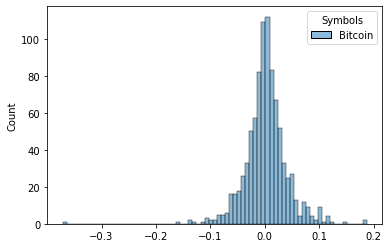

In [4]:
sns.histplot(data=returns)

In [5]:
def getHistoricalVar(returns, confidenceLevel):
    var = 100 * np.percentile(returns, 100 - confidenceLevel)
    print(
        "With %.2f%% percent confidence, we can say the most our portfolio will lose in a day is %.3f%% using historical VaR"
        % (confidenceLevel, var)
    )

In [6]:
getHistoricalVar(returns.Bitcoin, 95)

With 95.00% percent confidence, we can say the most our portfolio will lose in a day is -5.814% using historical VaR


In [7]:
getHistoricalVar(returns.Bitcoin, 99)

With 99.00% percent confidence, we can say the most our portfolio will lose in a day is -10.245% using historical VaR


# Conditional Value at Risk (known as Expected shortfall, we look at daily returns that are lower than VAR and take average of those values 

In [8]:
def getHistoricalCVar(returns, confidenceLevel):
    var = np.percentile(returns, 100 - confidenceLevel)
    cvar = returns[returns <= var].mean()
    print(
        "With %.2f%% percent confidence VaR, our Expected Shortfall is %.2f%% using historical VaR"
        % (confidenceLevel, 100 * cvar)
    )

In [9]:
getHistoricalCVar(returns.Bitcoin, 95)

With 95.00% percent confidence VaR, our Expected Shortfall is -8.84% using historical VaR


compare the Bitcoin results to a bond index, BLV.

In [11]:
start = datetime.date(2020, 1, 1)
end = datetime.date(2022, 6, 15)
# end = datetime.date.today()
prices = web.DataReader(["BLV"], "yahoo", start, end)["Adj Close"]
returns = prices.pct_change()
returns = returns.dropna()

In [12]:
getHistoricalVar(returns.BLV, 95)

With 95.00% percent confidence, we can say the most our portfolio will lose in a day is -1.355% using historical VaR


In [13]:
getHistoricalCVar(returns.BLV, 95)

With 95.00% percent confidence VaR, our Expected Shortfall is -2.29% using historical VaR


While Bitcoin's 95% VaR and CVaR over the last five years is about -6% and -9% respectively, the bond index, BLV, has -.93% and -1.5% for the same metrics. This goes to show how much more downside risk an asset like Bitcoin holds when compared to bonds.